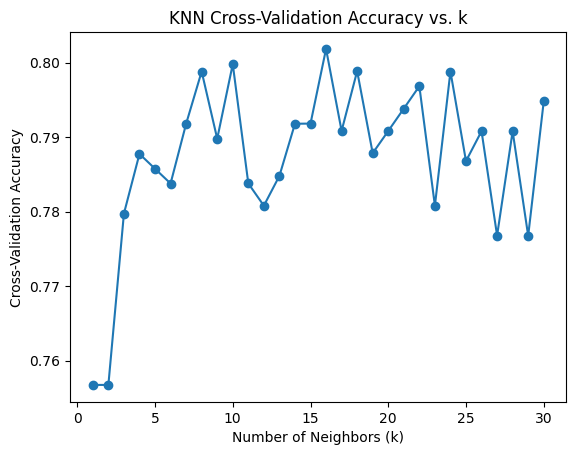

Best k value of (16) with a cross-validation accuracy of (0.8018383838383839)
Test accuracy using best k of (16): (0.7798165137614679)


In [10]:
import pandas as pd #for handlding csv files
import numpy as np #for the the math
from sklearn.model_selection import KFold #cross validation
import matplotlib.pyplot as plt #for plotting the values on a graph
from collections import Counter #for counting the elements in a list

#importing all the csv files and converting to arrays
xtraining = pd.read_csv("train_inputs.csv").values #
ytraining = pd.read_csv("train_labels.csv").values.ravel() #ravel for a 1d array of labels
xtesting = pd.read_csv("test_inputs.csv").values
ytesting = pd.read_csv("test_labels.csv").values.ravel()

class KNN:
    def __init__(self, k=3): #initializing and with k=3
        self.k = k
    def fit(self, xtraining, ytraining): #storing the training data
        self.xtraining = xtraining
        self.ytraining = ytraining

    def predict(self, xtesting): #predicts the label using the _predict combining
        return np.array([self._predict(X) for X in xtesting])

    def _predict(self, x): #prdiction for a single point
        distances = [np.linalg.norm(x - xtraining) for xtraining in self.xtraining] #using the distance formula
        k_indices = np.argsort(distances)[:self.k] #returning distances in ascending order, and select k closest points
        k_nearest_labels = [self.ytraining[i] for i in k_indices] #get labels of k nearest points
        most_common = Counter(k_nearest_labels).most_common(1) #finds the most frequent label
        return most_common[0][0] #return most common label


kf = KFold(n_splits=10, shuffle=True, random_state=5) #10 fold cross validation
k_values = range(1, 31) #range of k values 1-30 (n-1)
accuracy_scores = [] #storing the accuracy scores

for k in k_values: #for all k values
    knn = KNN(k) #init the knn with the current k value
    fold_accuracies = [] #storing the fold accuracy
    
    for training_idx, val_idx in kf.split(xtraining): #cross validation on the training data
       #splits the data (xtraining, ytraining) into training and validation subsets for each fold
        X_fold_training, X_fold_val = xtraining[training_idx], xtraining[val_idx]
        Y_fold_training, Y_fold_val = ytraining[training_idx], ytraining[val_idx]
        
        knn.fit(X_fold_training, Y_fold_training) #train the knn using the data for this fold
        y_pred = knn.predict(X_fold_val) #use the trained model to predict labels of the validation set
        fold_accuracies.append(np.mean(y_pred == Y_fold_val)) #find the accuracy for this fold by comparing the predictions to the actual values
    
    accuracy_scores.append(np.mean(fold_accuracies)) #after completing the folds, find the average accuracy over all folds and append for that k value

    
best_accuracy = max(accuracy_scores) #find the highest accuracy score
best_k = k_values[np.argmax(accuracy_scores)] #find the best k value by looking at the highest accuracy score


# plotting the validation accuracy for k
plt.plot(k_values, accuracy_scores, marker='o') #plot values
plt.xlabel('Number of Neighbors (k)') #x label
plt.ylabel('Cross-Validation Accuracy') #y label
plt.title('KNN Cross-Validation Accuracy vs. k') #title
plt.show() #display graph

print(f"Best k value of ({best_k}) with a cross-validation accuracy of ({best_accuracy})")

knn_final = KNN(k=best_k) #init the knn with the best value of k
knn_final.fit(xtraining, ytraining) #train the model on the training data

y_test_pred = knn_final.predict(xtesting) #do the prediction using the testing data

test_accuracy = np.mean(y_test_pred == ytesting) #calculate the testing accuracy
print(f"Test accuracy using best k of ({best_k}): ({test_accuracy})")